how this data contribution expands the OBIS holdings

- picking a species from SCCOOS, then pulling all the data for that species from OBIS
- plotting it all together with SCCOOS on a timeslider.

## Load library's

In [1]:
library(robis)
library(leaflet)
library(tidyverse)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0     v purrr   1.0.1
v tibble  3.2.1     v dplyr   1.1.1
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.4     v forcats 1.0.0
-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Get the SCCOOS data from OBIS

In [2]:
# get SCCOOS occurrence and measurement or fact data
sccoos_dataset_id = "c9aaa0e9-8f6c-4553-a014-a857baba0680"

species = "Lingulodinium polyedra"

sccoos_occur <- occurrence(
    datasetid = sccoos_dataset_id, mof=TRUE
)

Retrieved 5000 records of approximately 11724 (42%)
Retrieved 10000 records of approximately 11724 (85%)
Retrieved 11724 records of approximately 11724 (100%)


## Take a look at response data

In [3]:
# # make table bigger for review
options(repr.matrix.max.cols=100)
head(sccoos_occur,n = 1)

infraphylum    date_year scientificNameID                           
1 Dinoflagellata 2009      (urn:lsid:marinespecies.org:taxname:109462)
  scientificName superdomainid dropped hab  aphiaID decimalLatitude
1 Dinophysis     1             FALSE   TRUE 109462  34.408         
  infraphylumid phylumid familyid occurrenceStatus basisOfRecord    subkingdom
1 146203        450030   231772   present          HumanObservation Harosa    
  organismName   maximumDepthInMeters id                                  
1 Dinophysis_spp 1                    00056f10-de45-4217-b8f8-92f3d2a906b5
  order         organismQuantity dataset_id                          
1 Dinophysiales 100              c9aaa0e9-8f6c-4553-a014-a857baba0680
  decimalLongitude date_end    
1 -119.685         1.248653e+12
  occurrenceID                                          infrakingdom
1 HABs-StearnsWharf_2009-07-27T13:53:00Z_Dinophysis_spp Alveolata   
  subkingdomid date_start   organismQuantityType genus     
1 582419       1.248653e+12 cells/L              Dinophysis
  eventDate            eventID                                brackish
1 2009-07-27T13:53:00Z HABs-StearnsWharf_2009-07-27T13:53:00Z TRUE    
  infrakingdomid coordinateUncertaintyInMeters absence eventRemarks genusid
1 536209         12                            FALSE   20090727     109462 
  taxonID                             originalScientificName marine
1 urn:lsid:algaebase.org:taxname:6356 Dinophysis             TRUE  
  minimumDepthInMeters subphylumid countryCode date_mid     class       orderid
1 1                    562620      US          1.248653e+12 Dinophyceae 109390 
  geodeticDatum   kingdom   superdomain classid depth phylum  locationID       
1 EPSG:4326 WGS84 Chromista Biota       19542   1     Myzozoa HABs-StearnsWharf
  subphylum family        kingdomid node_id                              flags
1 Dinozoa   Dinophysaceae 7         b7c47783-a020-4173-b390-7b57c4fa1426 NA   
  sss   shoredistance sst  bathymetry
1 33.44 202           15.4 7         
  mof                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## Note measurement or fact data are in `mof` column.

In [4]:
# here are the mof observations associated with the first occurrence record above.
head(sccoos_occur$mof,n = 1)
# note measurementValue, measurementUnit and measurementType columns.

[[1]]
   measurementDeterminedBy measurementAccuracy measurementValue
1                       NA                  NA            3.234
2                       NA                  NA             5.64
3                       NA                  NA            1.221
4                       NA                  NA             5.64
5                       NA                  NA            0.892
6                       NA                  NA            0.245
7                       NA                  NA            1.136
8                       NA                  NA                0
9                       NA                  NA            1.221
10                      NA                  NA            0.875
11                      NA                  NA            9.938
12                      NA                  NA               17
   measurementRemarks measurementValueID level occurrenceID measurementUnit
1                  NA                 NA     1           NA              uM
2                  NA                 NA     1           NA           mg/m3
3                  NA                 NA     1           NA           mg/m3
4                  NA                 NA     1           NA           mg/m3
5                  NA                 NA     1           NA              uM
6                  NA                 NA     1           NA              uM
7                  NA                 NA     1           NA              uM
8                  NA                 NA     1           NA           ng/mL
9                  NA                 NA     1           NA           mg/m3
10                 NA                 NA     1           NA              uM
11                 NA                 NA     1           NA              uM
12                 NA                 NA     1           NA         Celsius
   measurementDeterminedDate measurementType
1                         NA        Ammonium
2                         NA      Avg_Chloro
3                         NA       Avg_Phaeo
4                         NA            Chl1
5                         NA         Nitrate
6                         NA         Nitrite
7                         NA Nitrite_Nitrate
8                         NA             pDA
9                         NA          Phaeo1
10                        NA       Phosphate
11                        NA        Silicate
12                        NA            Temp
                                      measurementUnitID
1                                                    NA
2  http://vocab.nerc.ac.uk/collection/P06/current/UMMC/
3  http://vocab.nerc.ac.uk/collection/P06/current/UMMC/
4  http://vocab.nerc.ac.uk/collection/P06/current/UMMC/
5                                                    NA
6                                                    NA
7                                                    NA
8                                                    NA
9  http://vocab.nerc.ac.uk/collection/P06/current/UMMC/
10                                                   NA
11                                                   NA
12 http://vocab.nerc.ac.uk/collection/P06/current/UPAA/
                                                                                                                                        measurementTypeID
1                                                                                                http://vocab.nerc.ac.uk/collection/S27/current/CS026908/
2                                                                                                    http://vocab.nerc.ac.uk/collection/P25/current/CHLA/
3  http://vocab.nerc.ac.uk/collection/P25/current/PHAEO/; https://www.bco-dmo.org/parameter/925; http://vocab.nerc.ac.uk/collection/P01/current/PHAEFMP1/
4                                                                                                    http://vocab.nerc.ac.uk/collection/P25/current/CHLA/
5                                                        http://vocab.nerc.ac.uk/collection

## Create a map of all SCCOOS observations for the dataset

In [5]:
# create a map
library(htmlwidgets)
library(IRdisplay)

m = map_leaflet(sccoos_occur)
m
# saveWidget(m, "sccoos_data.html", selfcontained = FALSE)
# display_html("<iframe src=\"sccoos_data.html\"></iframe>")

HTML widgets cannot be represented in plain text (need html)

## Query OBIS for _Lingulodinium polyedra_ and map out all observations (excluding SCCOOS' contributions)
Now that we have all the SCCOOS occurrence and mof observations, we'd like to look at one species and see SCCOOS' contributions to OBIS for that species.

In [6]:
# get all Lingulodinium polyedra occurrences from OBIS
lingpoly_occur <- occurrence(
    scientificname = species
)

# or by taxon id from AphiaID: urn:lsid:algaebase.org:taxname:233592
# could use rtaxize 'get_wormsid' here or obistools 'match_taxa' to search on taxonid from species name? 
# lingpoly_occur <- occurrence(
#   taxonid = '233592'
# )

# remove sccoos entries from full occurrence response
lingpoly_occur <- lingpoly_occur[!lingpoly_occur$dataset_id==sccoos_dataset_id,]

# create a map of all lingulodinium polyedra, excluding sccoos contributions
m = map_leaflet(lingpoly_occur)
m
# saveWidget(m, "lingpoly_data.html", selfcontained = FALSE)
# display_html("<iframe src=\"lingpoly_data.html\"></iframe>")

Retrieved 5000 records of approximately 10219 (48%)
Retrieved 10000 records of approximately 10219 (97%)
Retrieved 10219 records of approximately 10219 (100%)


HTML widgets cannot be represented in plain text (need html)

## Subset SCCOOS response for species and move the mof data into occurrence data table

In [7]:
# build a character list of all the unique measurement or fact types.
sccoos_lingpoly_occur <- sccoos_occur[ which(sccoos_occur$scientificName == species), ]

for (j in 1:length(sccoos_lingpoly_occur$mof)){
    if (j == 1){
        measurementTypes <- sccoos_lingpoly_occur$mof[[j]]$measurementType
    } else {
    measurementTypes <- unique(c(measurementTypes, sccoos_lingpoly_occur$mof[[j]]$measurementType))
        }
}

# add columns for all potential mof types
sccoos_lingpoly_occur[,measurementTypes] <- ""

## Populate mof_tbl with mof observations
for (i in 1:length(sccoos_lingpoly_occur$mof)){
    for (j in 1:length(sccoos_lingpoly_occur$mof[[i]])){
        for (var in measurementTypes){
            if ( length(sccoos_lingpoly_occur$mof[[i]]$measurementType[j]) == 0 || is.na(sccoos_lingpoly_occur$mof[[i]]$measurementType[j])) {
            } else{
                if ( sccoos_lingpoly_occur$mof[[i]]$measurementType[j] == var ){
                    #print(paste("sccoos_lingpoly_occur$mof[[",i,"]]$measurementType[",j,"] =", sccoos_lingpoly_occur$mof[[i]]$measurementType[j]," = ", sccoos_lingpoly_occur$mof[[i]]$measurementValue[j]))
                    sccoos_lingpoly_occur[i,var] <- sccoos_lingpoly_occur$mof[[i]]$measurementValue[j]
                } else {
                    sccoos_lingpoly_occur[i,var] <- NA
                }     
            }
        }
    }
}

# convert mofs to doubles
measurementTypes <- c("organismQuantity", "sss", "sst", "bathymetry", measurementTypes)
sccoos_lingpoly_occur[ ,measurementTypes] <- apply(sccoos_lingpoly_occur[ ,measurementTypes], 2, function(x) as.double(x))
sccoos_lingpoly_occur$dateTime <- as.Date(sccoos_lingpoly_occur$eventDate, format = "%Y-%m-%dT%H:%M:%SZ", tz=utc)

# collect column names and drop 'mof' column from list (we don't need it anymore):
cols <- colnames(sccoos_lingpoly_occur)
cols <- cols[cols!='mof']
sccoos_lingpoly_occur <- sccoos_lingpoly_occur[cols]

# What data are in our new data table?
glimpse(sccoos_lingpoly_occur)

Rows: 1,136
Columns: 86
$ infraphylum                   <chr> "Dinoflagellata", "Dinoflagellata", "Din~
$ date_year                     <int> 2018, 2016, 2017, 2010, 2019, 2019, 2019~
$ scientificNameID              <chr> "(urn:lsid:marinespecies.org:taxname:233~
$ scientificName                <chr> "Lingulodinium polyedra", "Lingulodinium~
$ superdomainid                 <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ dropped                       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE~
$ hab                           <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE~
$ aphiaID                       <int> 233592, 233592, 233592, 233592, 233592, ~
$ decimalLatitude               <dbl> 35.17000, 32.86700, 34.00800, 34.40800, ~
$ infraphylumid                 <int> 146203, 146203, 146203, 146203, 146203, ~
$ phylumid                      <int> 450030, 450030, 450030, 450030, 450030, ~
$ familyid                      <int> 109428, 109428, 109428, 109428, 109428, ~
$ occurrenceStat

## Group observations by location and print out some statistics

In [8]:
# create a grouped data table
by_location <- sccoos_lingpoly_occur %>% group_by(locationID)

by_location %>%
    summarise(
        n = n(),
        Temp = mean(Temp, na.rm = TRUE),
        Salinity = mean(Salinity, na.rm = TRUE),
        organismQuantity = max(organismQuantity, na.rm = TRUE),
        startDate = min(dateTime, na.rm = TRUE),
        endDate = max(dateTime, na.rm = TRUE)
    )



locationID           n   Temp     Salinity organismQuantity startDate 
1 HABs-CalPoly         119 15.09161 NaN        464842.9       2008-08-19
2 HABs-MontereyWharf    62 14.41680 NaN         39570.0       2012-06-27
3 HABs-NewportPier     179 17.78444 NaN        852749.0       2008-07-14
4 HABs-SantaMonicaPier 311 17.78664 NaN      16788384.0       2008-06-30
5 HABs-ScrippsPier     177 17.58588 NaN       1528597.0       2011-01-10
6 HABs-StearnsWharf    288 16.39645 NaN        389358.0       2008-06-30
  endDate   
1 2021-09-07
2 2020-02-26
3 2021-08-30
4 2021-08-23
5 2020-03-02
6 2021-07-12

## Create time-series plots for observations, colored by location

Warning message:
"Removed 44 rows containing missing values (`geom_line()`)."


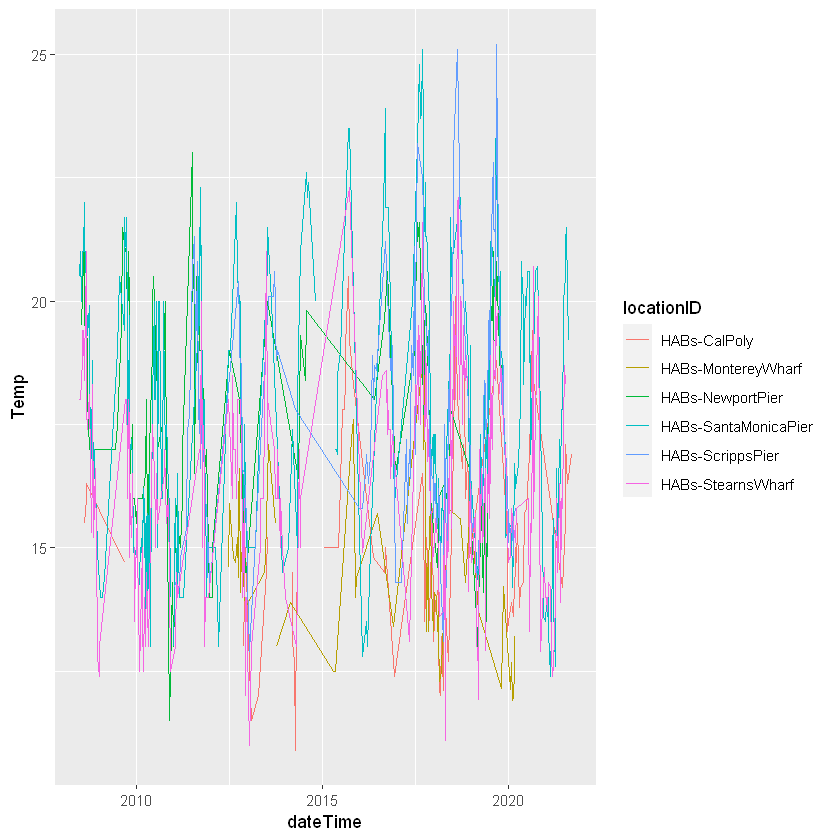

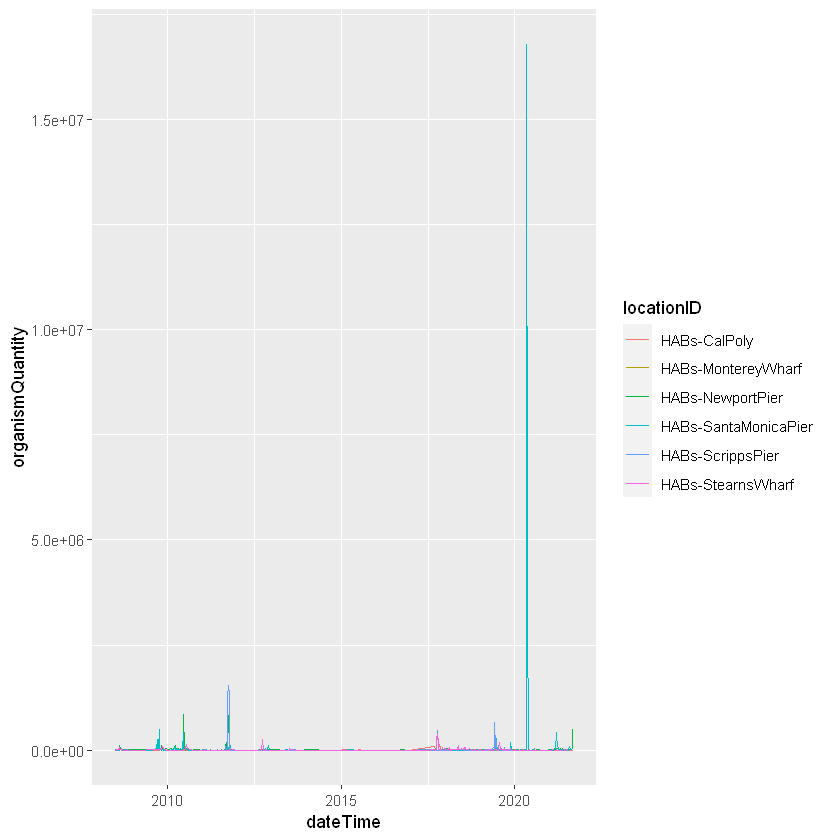

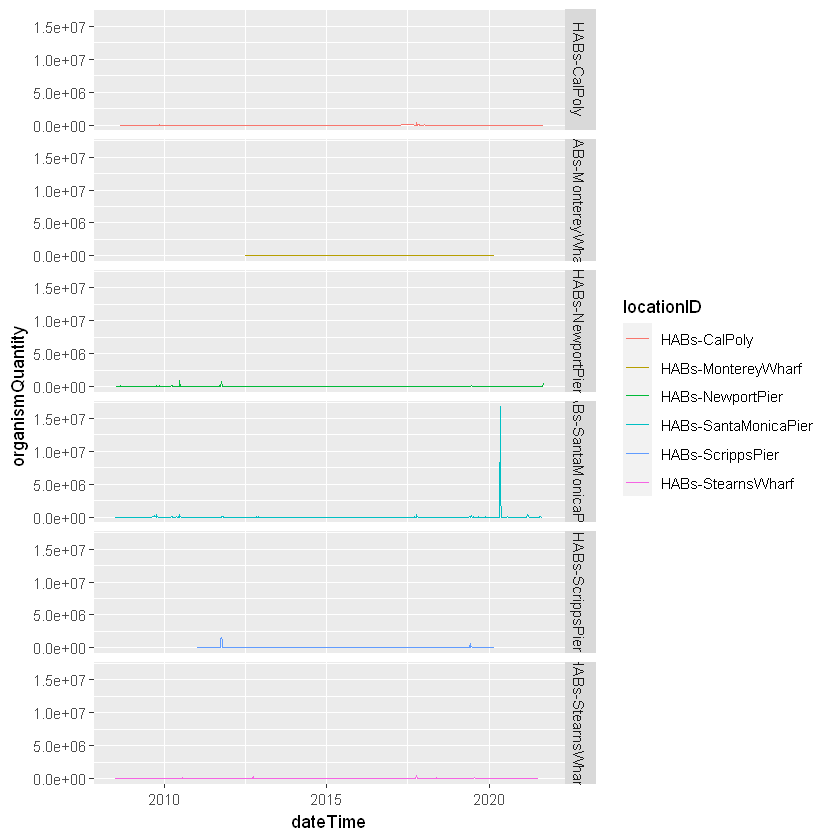

In [9]:
library(ggplot2)

p1 <- ggplot(by_location, aes(x=dateTime, y=Temp, col=locationID)) +
geom_line()

p2 <- ggplot(by_location, aes(x=dateTime, y=organismQuantity, col=locationID)) +
geom_line()

p1
p2

# create subset plots
p2+facet_grid(rows = vars(locationID))

# p3 <- ggplot(filter(sccoos_lingpoly_occur=='HABs-CalPoly'), aes(x=dateTime)) +
# geom_line()
# p3

# p3 + facet_grid(rows = vars(c(Temp, organismQuantity)))
# p3

## Make a map of all occurrences with SCCOOS obs as cluster pins

In [10]:
m <- map_leaflet(lingpoly_occur) %>% 
  addTiles() %>% 
  addMarkers(
    sccoos_lingpoly_occur$decimalLongitude, sccoos_lingpoly_occur$decimalLatitude,
    clusterOptions = markerClusterOptions(),
  )
m
# saveWidget(m, "lingpoly_data_sub.html", selfcontained = FALSE)
# display_html("<iframe src=\"lingpoly_data_sub.html\"></iframe>")

HTML widgets cannot be represented in plain text (need html)

## Make a master map.
This map has all the _Lingulodinium polyedra_ obeservations from OBIS with clustered points for the SCCOOS observations. Each cluster opens to pins for each mof observed at that location. Each specfic pin opens a time-series plot of the mof observation.

In [11]:
m <- map_leaflet(lingpoly_occur)
# iterate through each site
for (site in unique(sccoos_lingpoly_occur$locationID)) {
    
    # filter for the site
    site_filt <- filter(sccoos_lingpoly_occur, locationID == site)
    
    # create time-series plot for each measurement type
    pop <- character()
    #color <- 'blue'
    for (variable in measurementTypes){
        if ( !all(is.na(site_filt[,variable])) ) {
            ggplot(site_filt, aes_string(x="dateTime", y=variable)) + geom_point() + ggtitle(site)
            image_name <- paste0(site,variable,"_ts.png")
            ggsave(image_name, width = 2, height = 2)
            pop1 <- paste0("<img src=\"",image_name,"\" />")
            pop <- c(pop,pop1)
            #c1 <- 'red'
            #color <- c(color,c1)
            }
    }

    m <- addTiles(m) %>%
         addMarkers(
            unique(site_filt$decimalLongitude), unique(site_filt$decimalLatitude),
            clusterOptions=markerClusterOptions(),
            popup = pop
        )

    }

m

# filename <- paste0("map.html")
# saveWidget(m, filename, selfcontained = FALSE)
# html_file = paste0("<iframe src=\"",filename,"\"></iframe>")
# display_html(html_file)

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation ideoms with `aes()`"
Warning message:
"Removed 116 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 97 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 26 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 309 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 282 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 6 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 151 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 178 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 164 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 44 rows containing missing values (`geom_point()`)."
Warning mes

HTML widgets cannot be represented in plain text (need html)